# LINEAR REGRESSION MODEL
* simple linear regression
* multiple linear regression

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# MANUALLY CODED

Simple Linear Regression

y = mx + c 

y = wx + b

y -> dependent var

w -> weight / slope

x -> independent var

b -> bias / y-intercept

w,b -> model parameters

learning rate, no of epochs -> hyperparameters (given manually)

w2 = w1 - L*dw

b2 = b1 - L*db

In [58]:
class Linear_Regression():
    
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # fit data into the model
    def fit(self, X, Y):
        
        # m -> no training examples
        # n -> no of features 
        #      in simple Linear Regression, n = 1
        self.m, self.n = X.shape  # no of rows and cols

        # initiating weight and bias with 0
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        #implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):

        Y_prediction = self.predict(self.X)

        #calculate te gradient
        dw= -(2*(self.X.T).dot(self.Y - Y_prediction))/self.m
        db= -2 * np.sum(self.Y - Y_prediction)/self.m

        #updating the weights
        self.w= self.w - self.learning_rate*dw
        self.b= self.b - self.learning_rate*db

    def predict(self, X):
        return X.dot(self.w) + self.b

using the linear regression manually coded model for prediction.

In [59]:
sal_data = pd.read_csv('datasets/salary_data.csv')
sal_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [60]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [61]:
sal_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [62]:
sal_data.shape

(30, 2)

split feature and target var

In [63]:
X = sal_data.iloc[:,:-1].values
Y = sal_data.iloc[:, -1].values
Y = Y.astype(float)

In [64]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [65]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


train test split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 2)

training the manually coded model

In [67]:
model = Linear_Regression(learning_rate= 0.02, no_of_iterations= 1000)

**QUESTION**

taking learning rate = 0.12

no of iter = 500

getting nan prediction

why ?

**ans**

low learning rate -> more no. of iterations

In [68]:
model.fit(X_train, Y_train)

predict salary for test data

In [69]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36131.38761404  34224.40067561  66643.17862889  59015.23087518
  91434.00882846  80945.58066711 101922.43698982  52340.77659068
  42805.84189854]


In [70]:

test_data_sample = X_test[4]
test_data_sample_prediction = model.predict(np.array([test_data_sample]))
print(test_data_sample_prediction)

[91434.00882846]


In [71]:
test_data_sample_prediction = model.predict(np.array([12.5]))
print(test_data_sample_prediction)

142922.6561660318


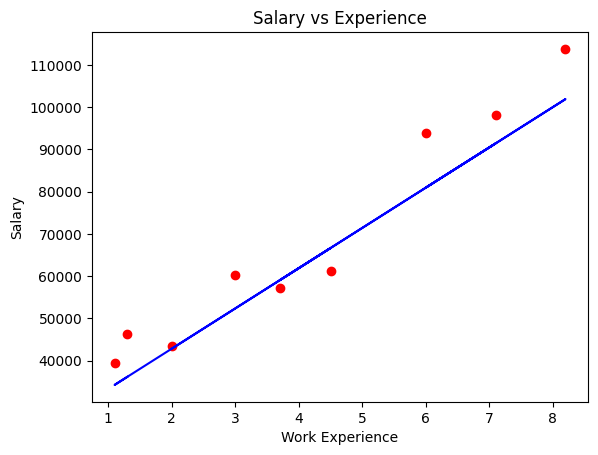

In [72]:
plt.scatter(X_test, Y_test, color='red')
plt.plot (X_test, test_data_prediction, color= 'blue')
plt.xlabel('Work Experience')
plt.ylabel("Salary")
plt.title('Salary vs Experience')
plt.show()

performance metrics

1. MAE (Mean Absolute Error)

(A model with less MAE performs better than model with large MAE value.)

In [73]:
from sklearn.metrics import mean_absolute_error
MAE1 = mean_absolute_error(Y_test, test_data_prediction)
print(MAE1)

6977.997359978957


2. MSE (Mean Square Error)

(A large MSE value means that the data values are dispersed widely around the mean of the data and a small MSE value means that the data values are closely dispersed around the mean. 

i.e. A model with small MSE value has better performance.)

In [74]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, test_data_prediction))

# Defining our own MSE function
def own_mean_squared_error(actual, predictions):
    return ((predictions - actual) ** 2).mean()

print(own_mean_squared_error(Y_test, test_data_prediction))

MSE1 = mean_squared_error(Y_test, test_data_prediction)

64456382.931735076
64456382.931735076


3. RMSE (root mean squared error)

Root Mean Square Error has the same unit of outcome var.

In [75]:
def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

RMSE1 = root_mean_squared_error(Y_test, test_data_prediction)
print(RMSE1)

8028.473262814984


For sklearn version ≥ 0.22.0, sklearn.metrics has a mean_squared_error function with a squared kwarg (default value is True). Setting squared value to False will return RMSE value.

In [76]:
print(mean_squared_error(Y_test, test_data_prediction, squared = False))

8028.473262814984


C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4. R2 score
-  It indicates how closer are the predicted values to the actual values.
- also known as the coefficient of determination gives the measure of how good a model fits to a given dataset.

R² value ranges from -∞ to 1.

 A model with negative R² value indicates that the best fit line is performing worse than the average fit line.

In [77]:
from sklearn.metrics import r2_score

R2_1 = r2_score(Y_test, test_data_prediction)
print(R2_1)

0.9001371412951691


5. Adjusted R2

(no inbuilt function)

In [78]:
def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2

num_samples = X_test.shape[0]
num_predictors = X_test.shape[1]
adj_R2_1 = adjusted_r2_score(Y_test, test_data_prediction, num_predictors, num_samples)
print(adj_R2_1)

0.8858710186230504


# using sklearn

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
sal_data = pd.read_csv('datasets/salary_data.csv')
X = sal_data.iloc[:,:-1].values
Y = sal_data.iloc[:, -1].values
Y = Y.astype(float)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [82]:
model.fit(X_train, Y_train)

LinearRegression()

In [83]:
predictions2 = model.predict(X_test)
print(predictions2)

[ 36143.62176044  34237.05465324  66648.69547576  59022.42704693
  91434.06786946  80947.94877982 101920.1869591   52349.44217171
  42816.60663567]


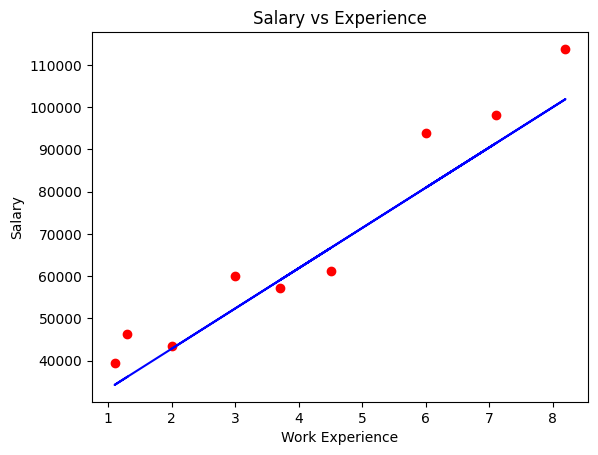

In [84]:
plt.scatter(X_test, Y_test, color='red')
plt.plot (X_test, predictions2, color= 'blue')
plt.xlabel('Work Experience')
plt.ylabel("Salary")
plt.title('Salary vs Experience')
plt.show()

performance metrics

In [85]:
from sklearn.metrics import mean_absolute_error
MAE2 = mean_absolute_error(Y_test, predictions2)
print("MAE:",MAE2)

from sklearn.metrics import mean_squared_error
MSE2 = mean_squared_error(Y_test, predictions2)
print("MSE:",MSE2)

RMSE2 = mean_squared_error(Y_test, predictions2, squared = False)
print("RMSE:",RMSE2)

from sklearn.metrics import r2_score
R2_2 = r2_score(Y_test, predictions2)
print("R2:",R2_2)

def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2

num_samples = X_test.shape[0]
num_predictors = X_test.shape[1]
adj_R2_2 = adjusted_r2_score(Y_test, predictions2, num_predictors, num_samples)
print("Adjusted R2:",adj_R2_2)



MAE: 6974.465965919014
MSE: 64406629.38525968
RMSE: 8025.3740962811
R2: 0.9002142249159952
Adjusted R2: 0.8859591141897089


C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# using OLS (Ordinary Least Squares)

In [86]:
import statsmodels.api as sm

In [87]:
sal_data = pd.read_csv('datasets/salary_data.csv')
X = sal_data.iloc[:,:-1]
Y = sal_data.iloc[:, -1]
Y = Y.astype(float)

In [88]:
# Add constant term to independent variables
X = sm.add_constant(X)

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

train the ols model

In [90]:
model_ols = sm.OLS(Y_train, X_train)
ols_results = model_ols.fit()

predictions

In [91]:
predictions3 = ols_results.predict(X_test)
print(predictions3)

1      36143.621760
0      34237.054653
14     66648.695476
9      59022.427047
21     91434.067869
19     80947.948780
23    101920.186959
6      52349.442172
3      42816.606636
dtype: float64


note :

* We add a constant term to the independent variables. This is because the OLS model in statsmodels doesn't automatically include an intercept like LinearRegression in sklearn.
* We create an OLS model object using sm.OLS(Y_train, X_train), where Y_train is the dependent variable and X_train is the matrix of independent variables.
* We fit the OLS model using ols_results = model_ols.fit()

In [92]:
'''
plt.scatter(X_test, Y_test, color='red')
plt.plot (X_test, predictions3, color= 'blue')
plt.xlabel('Work Experience')
plt.ylabel("Salary")
plt.title('Salary vs Experience')
plt.show()
'''

'\nplt.scatter(X_test, Y_test, color=\'red\')\nplt.plot (X_test, predictions3, color= \'blue\')\nplt.xlabel(\'Work Experience\')\nplt.ylabel("Salary")\nplt.title(\'Salary vs Experience\')\nplt.show()\n'

X_test contains multiple columns, as it's a matrix of features. Therefore, plotting X_test directly against Y_test or predictions will not work, as X_test has multiple dimensions.

To plot the relationship between a single feature (such as "Work Experience") and the target variable ("Salary"), we need to extract that specific feature from X_test.

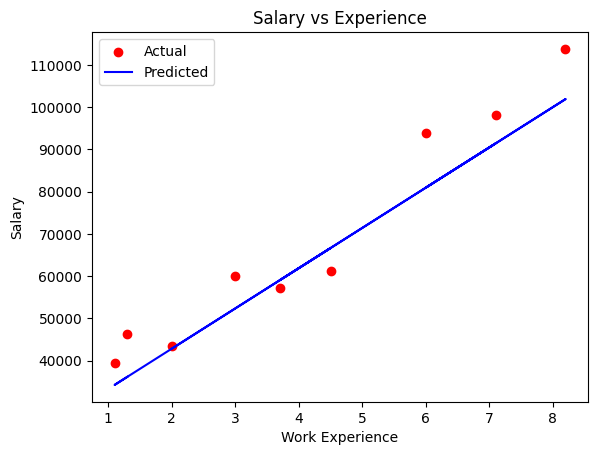

In [93]:
work_experience = X_test.iloc[:, 1]

# Scatter plot of actual vs. predicted values against work experience
plt.scatter(work_experience, Y_test, color='red', label='Actual')
plt.plot(work_experience, predictions3, color='blue', label='Predicted')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()
plt.show()

performance metrics

In [94]:
from sklearn.metrics import mean_absolute_error
MAE3 = mean_absolute_error(Y_test, predictions3)
print("MAE:",MAE3)

from sklearn.metrics import mean_squared_error
MSE3 = mean_squared_error(Y_test, predictions3)
print("MSE:",MSE3)

RMSE3 = mean_squared_error(Y_test, predictions3, squared = False)
print("RMSE:",RMSE3)

from sklearn.metrics import r2_score
R2_3 = r2_score(Y_test, predictions3)
print("R2:",R2_3)

def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2

num_samples = X_test.shape[0]
num_predictors = X_test.shape[1]
adj_R2_3 = adjusted_r2_score(Y_test, predictions3, num_predictors, num_samples)
print("Adjusted R2:",adj_R2_3)



MAE: 6974.465965919012
MSE: 64406629.38525964
RMSE: 8025.374096281098
R2: 0.9002142249159952
Adjusted R2: 0.8669522998879937


C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# comparing the predictions 

In [95]:
predictions_df = pd.DataFrame({
    'manual coded model predictions': test_data_prediction,
    'Predictions using model from sklearn': predictions2,
    'Predictions using model from ols': predictions3
})

predictions_df.reset_index(drop=True, inplace=True)

predictions_df

,manual coded model predictions,Predictions using model from sklearn,Predictions using model from ols
0,36131.387614,36143.621760,36143.621760
1,34224.400676,34237.054653,34237.054653
2,66643.178629,66648.695476,66648.695476
3,59015.230875,59022.427047,59022.427047
4,91434.008828,91434.067869,91434.067869
5,80945.580667,80947.948780,80947.948780
6,101922.436990,101920.186959,101920.186959
7,52340.776591,52349.442172,52349.442172
8,42805.841899,42816.606636,42816.606636


# comparing the performance (performance metrics)
* MAE
* MSE
* RMSE
* R2
* Adjusted R2

In [96]:
performance_df = pd.DataFrame({
    'manual coded model performance': (MAE1,MSE1,RMSE1,R2_1,adj_R2_1),
    'Predictions using model from sklearn': (MAE2,MSE2,RMSE2,R2_2,adj_R2_2),
    'Predictions using model from ols': (MAE3,MSE3,RMSE3,R2_3,adj_R2_3)
}, index=['MAE', 'MSE', 'RMSE', 'R2', 'ADJ_R2'])
performance_df 

,manual coded model performance,Predictions using model from sklearn,Predictions using model from ols
MAE,6.977997e+03,6.974466e+03,6.974466e+03
MSE,6.445638e+07,6.440663e+07,6.440663e+07
RMSE,8.028473e+03,8.025374e+03,8.025374e+03
R2,9.001371e-01,9.002142e-01,9.002142e-01
ADJ_R2,8.858710e-01,8.859591e-01,8.669523e-01


In [97]:
rounded_performance_metrics = [f'{val:.5f}' for val in [MAE1, MSE1, RMSE1, R2_1, adj_R2_1,
                                                        MAE2, MSE2, RMSE2, R2_2, adj_R2_2,
                                                        MAE3, MSE3, RMSE3, R2_3, adj_R2_3]]

performance_df = pd.DataFrame({
    'manual coded model performance': rounded_performance_metrics[:5],
    'Predictions using model from sklearn': rounded_performance_metrics[5:10],
    'Predictions using model from ols': rounded_performance_metrics[10:]
}, index=['MAE', 'MSE', 'RMSE', 'R2', 'ADJ_R2'])

# Display the DataFrame
performance_df

,manual coded model performance,Predictions using model from sklearn,Predictions using model from ols
MAE,6977.99736,6974.46597,6974.46597
MSE,64456382.93174,64406629.38526,64406629.38526
RMSE,8028.47326,8025.37410,8025.37410
R2,0.90014,0.90021,0.90021
ADJ_R2,0.88587,0.88596,0.86695
